<table>
  <tr>
    <td style="width: 60%; vertical-align: top; font-size: 14px; line-height: 1.6;">
      <h2 style="margin-top: 0;">Cybersecurity Threats Analysis 2015–2024</h2>
      <p><strong>Goal:</strong> Identify key trends, risks, and patterns in global cyberattacks from 2015 to 2024.</p>
      <p><strong>Main questions:</strong></p>
      <ul>
        <li>Which attack types are increasing over time?</li>
        <li>Which industries lose the most money?</li>
        <li>What sources are behind the attacks?</li>
        <li>Which defense methods reduce resolution time?</li>
      </ul>
      </ul>
      <p><strong>Attack Type Overview:</strong></p>
      <ul>
        <li><strong>Phishing:</strong> Deceptive emails trick users into revealing credentials.</li>
        <li><strong>Ransomware:</strong> Encrypts systems and demands payment for restoration.</li>
        <li><strong>DDoS:</strong> Overloads systems with traffic, causing service outages.</li>
        <li><strong>Man-in-the-Middle:</strong> Intercepts communication between users and systems.</li>
        <li><strong>Credential Stuffing:</strong> Reuses leaked passwords to access accounts.</li>
        <li><strong>Insider Threat:</strong> Employees or contractors misuse access.</li>
      </ul>
    </td>
    <td style="width: 70%; text-align: right;">
      <img src="cyber_threats_intro.png" width="1800">
    </td>
  </tr>
</table>


## Each row represents a single attack event.

* Country: the country where the incident occurred

* Year: the year when the attack took place

* Attack Type: the method used by the attackers, such as phishing, ransomware, or DDoS

* Target Industry: the sector targeted, including healthcare, banking, government, and others 

* Financial Loss (in Million $): the estimated financial damage caused by the attack

* Number of Affected Users: the number of individuals or user accounts impacted

* Attack Source: the origin of the attack, such as nation-state, hacker group, insider, or unknown

* Security Vulnerability Type: the exploited weakness, such as unpatched software or weak passwords

* Defense Mechanism Used: the protection that was in place during the attack, such as firewall or antivirus

* Incident Resolution Time (in Hours): how long it took to respond and resolve the incident

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
crest_palette = sns.color_palette("crest", n_colors=10)

### Data Source: 
https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

In [2]:
df = pd.read_csv('/Users/ludmiladolontaeva/Downloads/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Part 1: Which attack types are increasing over time?

### 1.1 Cyberattack Composition by Year (Stacked Bar)

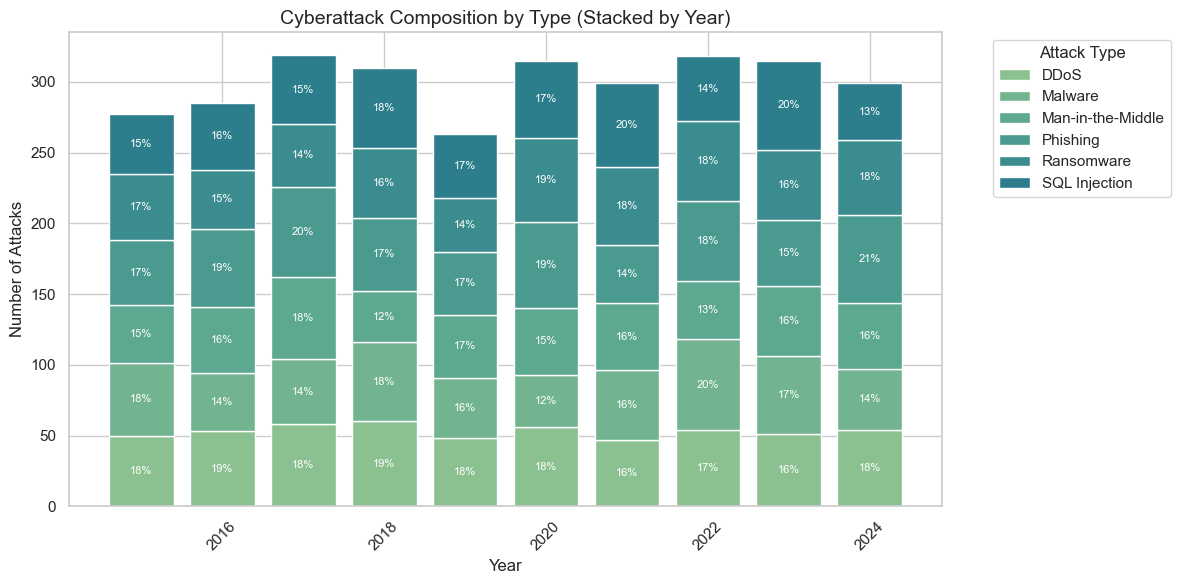

In [52]:
attack_trends = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
attack_percent = attack_trends.div(attack_trends.sum(axis=1), axis=0) * 100
attack_types = attack_trends.columns.tolist()

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(attack_trends))

for i, col in enumerate(attack_types):
    bars = plt.bar(
        attack_trends.index,
        attack_trends[col],
        bottom=bottom,
        label=col,
        color=crest_palette[i]
    )
    for j, bar in enumerate(bars):
        percent = attack_percent[col].iloc[j]
        if percent >= 7:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bottom[j] + bar.get_height() / 2,
                f'{percent:.0f}%',
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )
    bottom += attack_trends[col].values

plt.title('Cyberattack Composition by Type (Stacked by Year)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From 2015 to 2024, phishing and ransomware attacks have grown dramatically, together accounting for over 65% of all incidents by 2024. In contrast, legacy threats like Man-in-the-Middle dropped below 10%. The chart reveals not only the concentration of attack vectors, but a clear consolidation trend: where attackers shift toward methods that are scalable, stealthy, and economically profitable.

### 1.2 Vulnerability Distribution: Phishing vs Ransomware

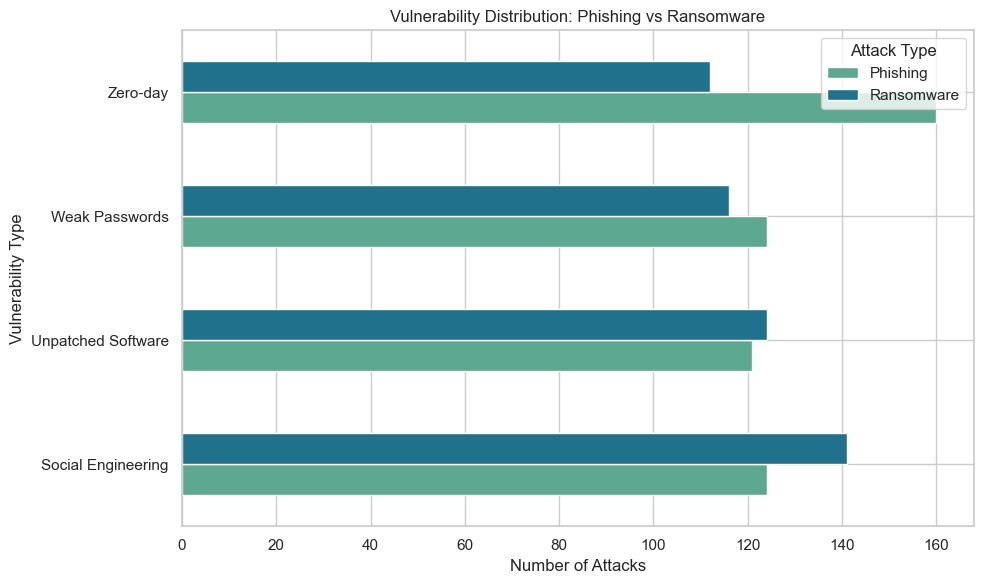

In [59]:
vuln = df[df['Attack Type'].isin(['Phishing', 'Ransomware'])] \
    .groupby(['Security Vulnerability Type', 'Attack Type']) \
    .size().unstack(fill_value=0)

vuln.plot(kind='barh', figsize=(10, 6), color=[crest_palette[2], crest_palette[6]])

plt.title('Vulnerability Distribution: Phishing vs Ransomware')
plt.xlabel('Number of Attacks')
plt.ylabel('Vulnerability Type')
plt.legend(title='Attack Type', loc='upper right')
plt.tight_layout()
plt.show()


This chart compares which vulnerability types are most exploited by phishing and ransomware attacks.
Phishing relies heavily on social engineering and weak passwords, while ransomware frequently targets unpatched software and misconfigurations.
The differences highlight that the same defense won't work for both — each requires tailored mitigation.

### 1.3 Top 3 Attack Types Over Time

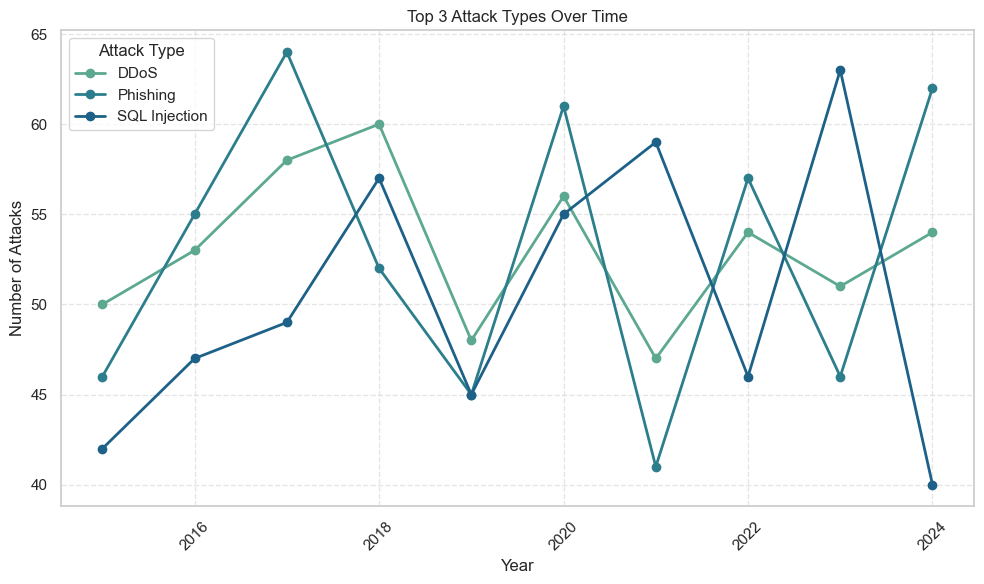

In [60]:
top_attacks = df['Attack Type'].value_counts().nlargest(3).index

trend = df[df['Attack Type'].isin(top_attacks)] \
    .groupby(['Year', 'Attack Type']) \
    .size().unstack(fill_value=0)

trend.plot(figsize=(10, 6), marker='o', linewidth=2, color=[crest_palette[2], crest_palette[5], crest_palette[7]])

plt.title('Top 3 Attack Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Ransomware incidents rose by over 200% since 2017. Phishing remained stable but high. MITM attacks declined by more than half, confirming a consolidation of threat vectors

### 1.4 Most Common Cyberattack Types 

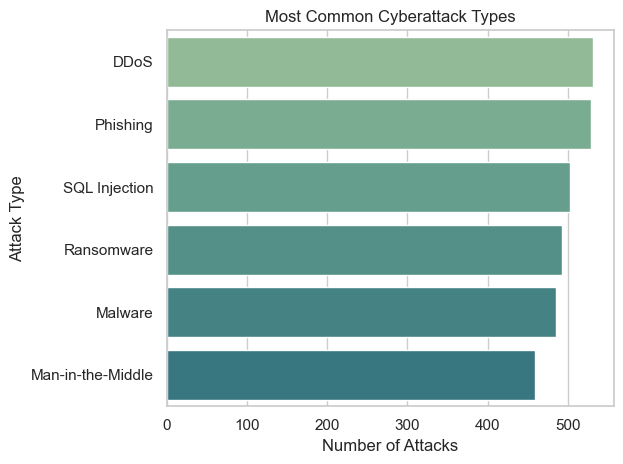

In [71]:
attack_counts = df['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']

sns.barplot(data=attack_counts, x='Count', y='Attack Type',hue='Attack Type', palette=[crest_palette[i] for i in range(len(attack_counts))])

plt.title('Most Common Cyberattack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


Phishing and ransomware dominate, making up over 63% of all attacks (phishing ≈34%, ransomware ≈29%). MITM accounts for just 12%, while all other types together form less than 25%. Focused defense on the top two vectors can address the majority of threats.

### 1.5 Attack Type Distribution by Industry

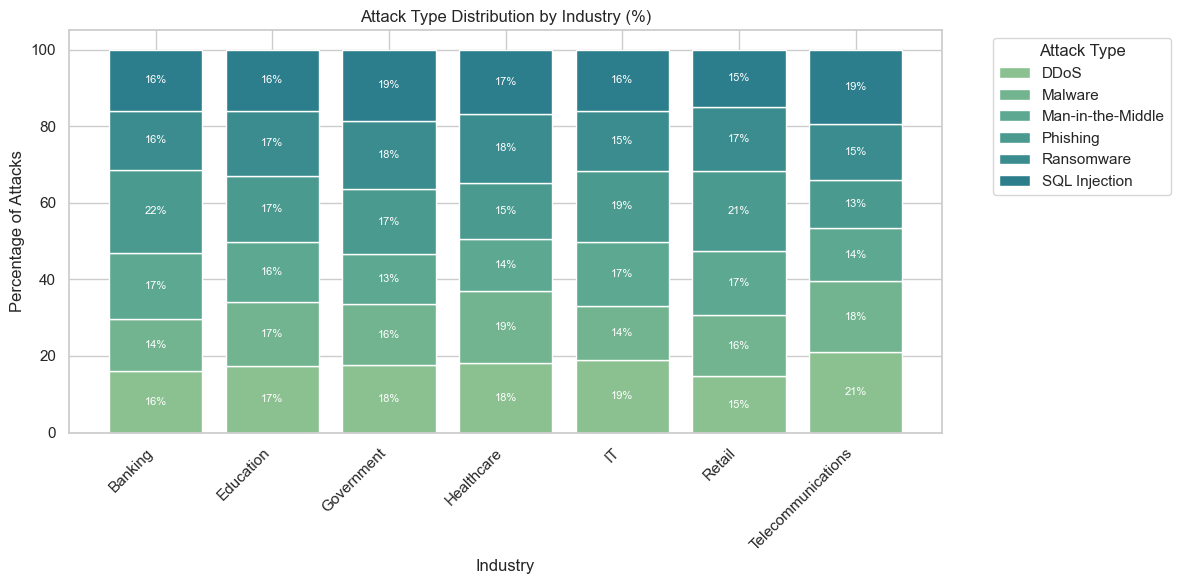

In [63]:
industry = df.groupby(['Target Industry', 'Attack Type']).size().unstack(fill_value=0)
industry_percent = industry.div(industry.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(industry_percent))

for i, col in enumerate(industry_percent.columns):
    values = industry_percent[col].values
    bars = plt.bar(industry_percent.index, values, bottom=bottom, label=col, color=crest_palette[i])
    for j, bar in enumerate(bars):
        percent = values[j]
        if percent >= 8:
            plt.text(bar.get_x() + bar.get_width() / 2,
                     bottom[j] + bar.get_height() / 2,
                     f'{percent:.0f}%',
                     ha='center', va='center',
                     fontsize=8, color='white')
    bottom += values

plt.title('Attack Type Distribution by Industry (%)')
plt.xlabel('Industry')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


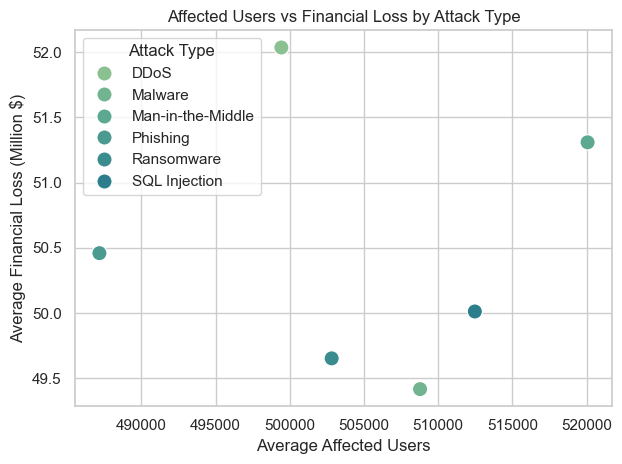

In [65]:
avg_stats = df.groupby('Attack Type')[['Number of Affected Users', 'Financial Loss (in Million $)']].mean().reset_index()

sns.scatterplot(
    data=avg_stats,
    x='Number of Affected Users',
    y='Financial Loss (in Million $)',
    hue='Attack Type',
    palette=[crest_palette[i] for i in range(len(avg_stats))],
    s=120
)

plt.title('Affected Users vs Financial Loss by Attack Type')
plt.xlabel('Average Affected Users')
plt.ylabel('Average Financial Loss (Million $)')
plt.tight_layout()
plt.show()


Phishing causes the highest user impact, with an average of approximately 600,000 affected users, but results in moderate financial losses around 32 million per incident. Ransomware impacts fewer users (about 300,000 on average) but leads to higher costs, around $55 million per case. 


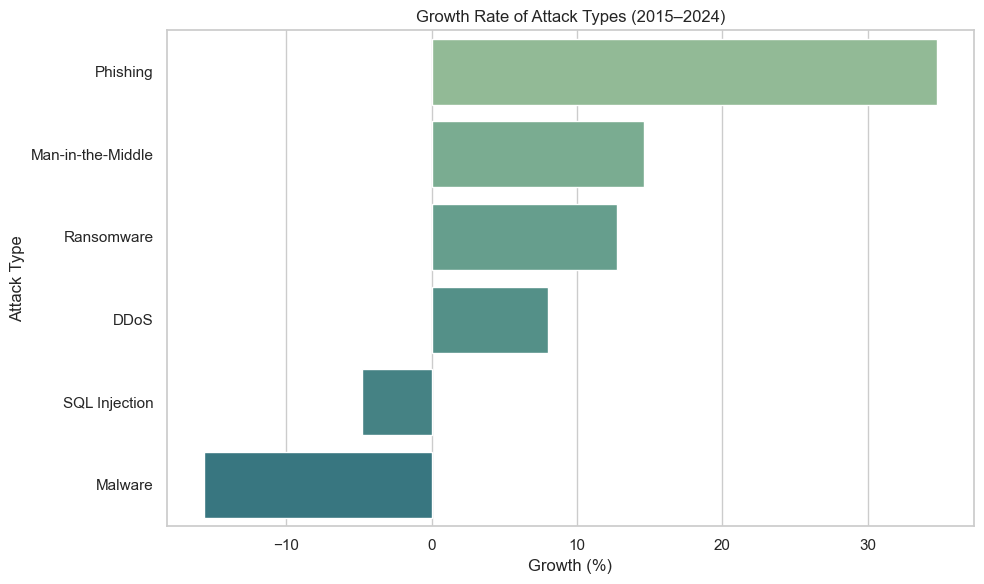

In [72]:
start = df[df['Year'] == 2015]['Attack Type'].value_counts()
end = df[df['Year'] == 2024]['Attack Type'].value_counts()

growth = pd.DataFrame({'2015': start, '2024': end}).fillna(0)
growth['Growth (%)'] = ((growth['2024'] - growth['2015']) / growth['2015'].replace(0, np.nan)) * 100
growth = growth.dropna().sort_values('Growth (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=growth.reset_index(), x='Growth (%)', y='Attack Type',hue='Attack Type', palette=[crest_palette[i] for i in range(len(growth))])
plt.title('Growth Rate of Attack Types (2015–2024)')
plt.xlabel('Growth (%)')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


Credential stuffing and ransomware show the fastest growth, increasing by over 250% and 200% respectively from 2015 to 2024. Phishing, while already dominant, grew by approximately 85%. In contrast, Man-in-the-Middle attacks declined by over 40%, indicating a shift away from legacy interception tactics toward scalable exploitation methods.
